In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def data_cleaner(df):
    data = df.copy()
    #remove the id, partlybad columns
    data.drop(["id","partlybad"],1,inplace=True)
    #set new index using the date column
    data.set_index(["date"],inplace=True)
    #add binary 'class2' col for event/non-event
    data["class2"] = np.where(data["class4"] == "nonevent", "nonevent","event")
    #arrange to put class2 col at the front
    cols = ['class2'] + [col for col in data if col != 'class2']
    data = data[cols]
    return data

##### New way to generate the data

def data_generator(df):
    '''
    input:
        df: dataframe to split stratified by variable class
        class: string with variable to use as response and as variable to stratify by
    output:
        X_train, y_train: variables and response 60% data 
        X_val, y_val: variables and response 20% data 
        X_trainval, y_trainval: variables and response 80% data (for cross validation)
        X_test, y_test: variables and response 20% data 
    '''
    
    X = df.drop(["class2","class4"], axis=1)
    y = df['class4']
    
    # 60%, 20%, 20%
    # Generate TrainVal 80% and test 20% 
    X_trainval, X_test, y_trainval, y_test = train_test_split( X, y, test_size=0.20, random_state=42, stratify=y)
    
    # Furthermore split train into Train and Val
    X_train, X_val, y_train, y_val= train_test_split( X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)
    
    return X_train, X_val, X_trainval, X_test, y_train, y_val, y_trainval, y_test

def convert_binary(y):
    '''
    Parameters
    ----------
    y : repsonse variable with 4 classes
    Returns
    -------
    y : reponse variable 2 classes
    '''
    y_bin = np.where(y == "nonevent", "nonevent","event")
    return y_bin

url = "https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/train.csv"
df = pd.read_csv(url)
df = data_cleaner(df)

X_train, X_val, X_trainval, X_test, y_train, y_val, y_trainval, y_test = data_generator(df)

# If needed conversion from 4 classes to binary classes
y_train_bin = convert_binary(y_train)
y_val_bin = convert_binary(y_val)
y_trainval_bin = convert_binary(y_trainval)
y_test_bin = convert_binary(y_test)


Accuracy on test set:  0.8461538461538461
Accuracy on validation set:  0.8461538461538461
Accuracy on train set:  0.9415584415584416


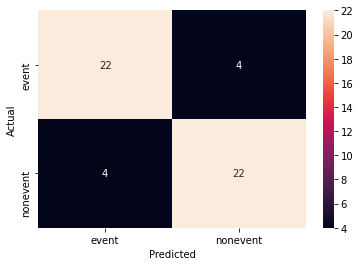

In [22]:
#logistic regression
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#normalise the X data
from sklearn.preprocessing import StandardScaler
X_train_norm = StandardScaler().fit_transform(X_train)
X_test_norm = StandardScaler().fit_transform(X_test)
X_val_norm = StandardScaler().fit_transform(X_val)

#binary classifier with logistic regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train_norm,y_train_bin)
y_pred_test = logistic_regression.predict(X_test_norm)
y_pred_train = logistic_regression.predict(X_train_norm)
y_pred_val = logistic_regression.predict(X_val_norm)

confusion_matrix = pd.crosstab(y_test_bin, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy on test set: ',metrics.accuracy_score(y_test_bin, y_pred_test))
print('Accuracy on validation set: ',metrics.accuracy_score(y_val_bin, y_pred_validation))
print('Accuracy on train set: ',metrics.accuracy_score(y_train_bin, y_pred_train))

Text(0.5, 0, 'Linear Response')

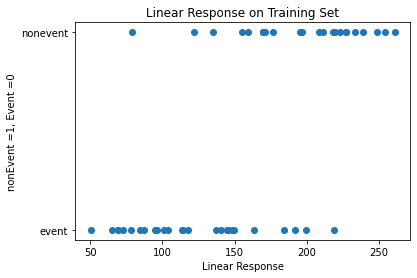

In [21]:
#Linear Reponse of test set

#extract coefs
betas = logistic_regression.coef_
beta_interr = logistic_regression.intercept_
#find linear responses for training set
beta_t_x =  X_test @ betas.T + beta_interr

#figures for linear response
fig = plt.figure()
plt.scatter(beta_t_x,y_test_bin)
plt.title("Linear Response on Training Set")
plt.ylabel("nonEvent =1, Event =0")
plt.xlabel("Linear Response")
